# Publication Figures

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pickle
%matplotlib inline
import scipy.stats
import os
import netCDF4 as nc

ImportError: Matplotlib requires numpy>=1.20; you have 1.19.2

In [ ]:
minfigsize = np.array([95,115])*0.0393701
maxfigsize = np.array([190,230])*0.0393701
plt.rc('font', size=10)
def rms(xx,xa):
    ss = xx-xa
    ss = ss**2
    ss = ss.sum(axis=0)
    ss = ss/40
    ss = np.sqrt(ss)
    return(ss)
wd = os.getcwd()

## Figure 3

In [2]:
def Figure3(figname=None):
    plt.rc('font', size=10)
    ds = xr.load_dataset('Processed Data/Training/tuning_results.nc')
    plt.subplots(2,2)
    plt.subplots_adjust(wspace=.2,hspace=.3)
    plt.subplot(2,2,4)
    plt.gca().tick_params(axis='both', which='major', labelsize=8)
    plt.xlabel('Epoch')
    plt.text(-.1,1.04,'d)',fontsize=12,transform=plt.gca().transAxes)
    plt.plot(range(1,26),ds.isel({'trial':47}).er_std_norm,'-k')
    plt.yscale('log')
    plt.title('Error StDev (norm)',fontsize=10)
    plt.subplot(2,2,3)
    plt.gca().tick_params(axis='both', which='major', labelsize=8)
    plt.xlabel('Epoch')
    plt.text(-.175,1.04,'c)',fontsize=12,transform=plt.gca().transAxes)
    plt.plot(range(1,26),np.abs(ds.isel({'trial':47}).er_mean_norm),'k')
    plt.title('Mean State Abs Error (norm)',fontsize=10)
    plt.subplot(2,2,1)
    plt.gca().tick_params(axis='both', which='major', labelsize=8)
    plt.text(-.175,1.04,'a)',fontsize=12,transform=plt.gca().transAxes)
    plt.plot(range(1,26),np.abs(ds.isel({'trial':47}).er_mean),'k')
    plt.title('Mean State Abs Error',fontsize=10)
    plt.subplot(2,2,2)
    plt.text(-.1,1.04,'b)',fontsize=12,transform=plt.gca().transAxes)
    plt.plot(range(1,26),ds.isel({'trial':47}).rmse_x,'-k',label="Validation")
    plt.plot(range(1,26),ds.isel({'trial':47}).train_rmse_x,'--k',label='Training')
    plt.title('State RMSE',fontsize=10)
    plt.gca().tick_params(axis='both', which='major', labelsize=8)
    plt.legend()
    plt.gcf().set_size_inches([6,6])
    if figname is not None:
        plt.savefig(figname)
Figure3()

NameError: name 'plt' is not defined

## Table 2

In [24]:
def Table2():
    aug = []
    sparse = []
    fns = ['sparse_base_rmse.nc'] +['sparse'+str(i)+'_rmse.nc' for i in range(3,10)]
    fns = ['Processed Data/Validation/'+fn for fn in fns]
    for fn in fns:
        da = xr.load_dataarray(fn)
        sparse.append("{:.4f}".format(da.values.mean()))
    fns = ['a_base_rmse.nc'] +['a'+str(i)+'_rmse.nc' for i in range(3,10)]
    fns = ['Processed Data/Validation/'+fn for fn in fns]
    for fn in fns:
        da = xr.load_dataarray(fn)
        aug.append("{:.4f}".format(da.values.mean()))
    print(' Run |  AllObs RMSE | Augmented RMSE  |    Sparse RMSE')
    obs_std = 1.093262
    fns = ['base_rmse.nc']+['s'+str(i)+'_rmse.nc' for i in range(1,10)]
    fns = ['Processed Data/Sensitivity/'+fn for fn in fns]
    allobs = []
    count = 0
    for fn in fns:
        da = xr.load_dataarray(fn)
        if count ==1:
            allobs.append("{:.4f}".format(100*da.values.mean()/(obs_std*2/3)))
        elif count ==2:
            allobs.append("{:.4f}".format(100*da.values.mean()/(obs_std*4/3)))
        else:
            allobs.append("{:.4f}".format(100*da.values.mean()/(obs_std)))
        count = count+1

    print(' base|   '  +allobs[0]+'    |   '+aug[0]+'        |      '+sparse[0])
    print('  s1 |   '+allobs[1]+'    |    N/A          |       N/A')
    print('  s2 |   '+allobs[2]+'    |    N/A          |       N/A')
    for i in range(3,10):
        print('  s'+str(i)+' |   '+allobs[i]+'    |   '  +aug[i-2]+'        |      '+sparse[i-2])
Table2()

 Run |  AllObs RMSE | Augmented RMSE  |    Sparse RMSE
 base|   20.3059    |   0.5678        |      0.8771
  s1 |   20.1084    |    N/A          |       N/A
  s2 |   20.6152    |    N/A          |       N/A
  s3 |   29.5916    |   0.5933        |      1.4539
  s4 |   19.6315    |   0.5644        |      0.8243
  s5 |   20.3089    |   0.5683        |      0.8828
  s6 |   20.3404    |   0.5699        |      0.8756
  s7 |   20.4216    |   0.5727        |      0.8815
  s8 |   22.6087    |   0.6170        |      0.9890
  s9 |   19.4958    |   0.5638        |      0.8985


## Figure 4

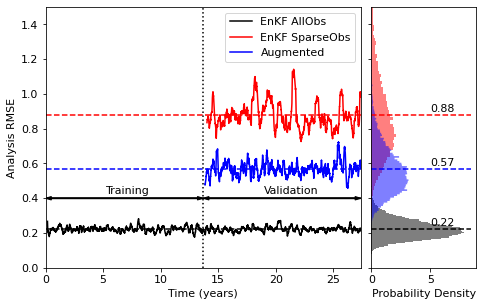

In [5]:
def Figure4(figname=None):
    plt.rc('font', size=11)
    windowsize = 12
    nt = int(windowsize/0.05)

    fig = plt.figure(figsize=[8,5])
    gs = fig.add_gridspec(1, 2,  width_ratios=(3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
    ax = fig.add_subplot(gs[0, 0])
    ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

    rmse = xr.open_dataarray('Processed Data/Sensitivity/base_rmse.nc')
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=nt).mean().plot.line(x='yrs',color='k',label='EnKF AllObs',ax=ax)
    rms_means = [float(rmse.mean())]
    rmse.plot.hist(ax=ax_histy,bins=100,density=True,alpha=0.5,color='k',orientation='horizontal',histtype='stepfilled')


    rmse = xr.open_dataarray('Processed Data/Validation/'+'sparse_base_rmse.nc')
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=nt).mean().plot.line(x='yrs',color='r',label='EnKF SparseObs',ax=ax)
    rms_means.append(float(rmse.mean()))
    rmse.plot.hist(ax=ax_histy,bins=200,density=True,alpha=0.5,color='r',orientation='horizontal',histtype='stepfilled')

    rmse = xr.open_dataarray('Processed Data/Validation/a_base_rmse.nc')
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=nt).mean().plot.line(x='yrs',color='b',label='Augmented',ax=ax)
    rmse.plot.hist(ax=ax_histy,bins=500,density=True,alpha=0.5,color='b',orientation='horizontal',histtype='stepfilled')
    rms_means.append(float(rmse.mean()))
    plt.sca(ax)
    plt.arrow(0,.4,1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.arrow(1000*5/365,.4,-1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.text(5.25,.425,'Training')
    plt.arrow(1000*5/365,.4,1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.arrow(2000*5/365,.4,-1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.text(19,.425,'Validation')
    plt.xlabel('Time (years)')
    plt.ylabel('Analysis RMSE')
    plt.xlim([0,29])
    ax.legend()
    ax.hlines(rms_means,xmin=0,xmax=29,colors=['k','r','b'],linestyles=['--'])
    for val in rms_means:
        ax_histy.text(5,val+.02,"{:.2f}".format(val))
    plt.vlines(float(rmse.yrs.max())/2,0,1.5,colors='k',linestyles=':')
    plt.ylim([0,1.5])
    plt.xlim([0,2000*5/365])
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.hlines(rms_means[1],0,8.5,colors='r',linestyles='--')
    ax_histy.hlines(rms_means[2],0,8.5,colors='b',linestyles='--')
    ax_histy.hlines(rms_means[0],0,8.5,colors='k',linestyles='--')
    plt.sca(ax_histy)
    plt.xlabel('Probability Density')
    plt.gcf().set_size_inches(maxfigsize[0],maxfigsize[1]*.5)
    #plt.gcf().set_size_inches(maxfigsize[0],maxfigsize[1]*.6)
    if figname is not None:
        plt.savefig(figname)
Figure4()

## Figure 5

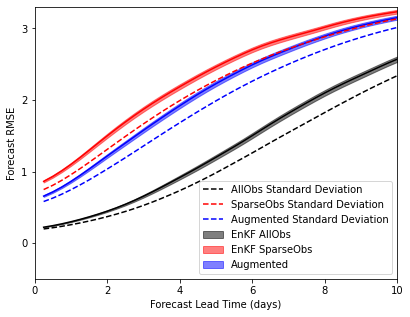

In [28]:
def Figure5(figname=None,version=0):
    plt.rc('font', size=10)
    dir = 'Processed Data/Other/'
    ds = xr.load_dataset(dir+'forecasts.nc')
    ds = ds.assign_coords(({'days':('time',(5*ds.time).data)}))
    ds.rmssparse.plot.line(x ='days',color='r')
    ds.denserms.plot.line(x='days',color='k')
    ds.augrms.plot.line(x='days',color='b')
    zscore = 1.96
    tmax = 4
    ti = np.arange(0.05, tmax,0.05)
    tplotmax = 2
    npts = 1000
    idx = int(len(ti)*tplotmax/tmax)+1

    plt.fill_between(ti[:idx]*5,ds.denserms[:idx]+zscore*ds.densestd[:idx]/np.sqrt(npts),ds.denserms[:idx]-zscore*ds.densestd[:idx]/np.sqrt(npts),color='k',label='EnKF AllObs',alpha=.5)

    plt.fill_between(ti[:idx]*5,ds.rmssparse[:idx]+zscore*ds.stdsparse[:idx]/np.sqrt(npts),ds.rmssparse[:idx]-zscore*ds.stdsparse[:idx]/np.sqrt(npts),color='r',label='EnKF SparseObs',alpha=.5)

    plt.fill_between(ti[:idx]*5,ds.augrms[:idx]+zscore*ds.augstd[:idx]/np.sqrt(npts),ds.augrms[:idx]-zscore*ds.augstd[:idx]/np.sqrt(npts),color='b',label='Augmented',alpha=.5)

    ds.dense_ens_std.plot.line(x='days',color='k',linestyle='--',label='AllObs Standard Deviation')
    ds.sparse_ens_std.plot.line(x='days',color='r',linestyle='--',label='SparseObs Standard Deviation')
    ds.aug_ens_std.plot.line(x='days',color='b',linestyle='--',label='Augmented Standard Deviation')

    plt.gcf().set_size_inches([6.5,5])
    plt.ylim([-.5,3.3])
    plt.xlim([0,5*tplotmax])
    plt.yticks(np.array([0,1,2,3]))
    plt.xlabel('Forecast Lead Time (days)')
    plt.ylabel('Forecast RMSE')
    plt.legend()
    if figname is not None:
        plt.savefig(figname)
Figure5()

## Figure 6

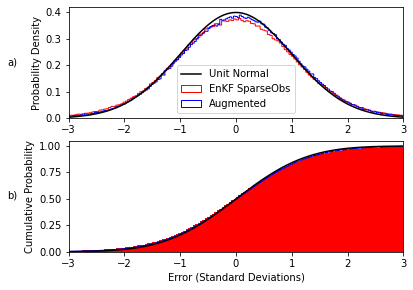

In [32]:
def Figure6(figname=None,version=0):
    plt.rc('font', size=10)
    plt.subplots(2,1)
    plt.subplot(2,1,1)
    x=np.linspace(-5,5,500)
    plt.plot(x,scipy.stats.norm.pdf(x),'k',label='Unit Normal')
    dir = 'Processed Data/Other/'
    err = xr.load_dataarray(dir+'errors_sparse.nc')
    err.plot.hist(bins=1250,density=True,histtype='step',color='r',label='EnKF SparseObs')

    err = xr.load_dataarray(dir+'errors_augmented.nc')
    err.plot.hist(bins=1000,density=True,histtype='step',color='b',label='Augmented')
    plt.xlim([-3,3])
    plt.ylabel('Probability Density')
    plt.legend()
    plt.text(-4.1,.2,'a)')


    plt.subplot(2,1,2)
    x=np.linspace(-3,3,500)
    plt.plot(x,scipy.stats.norm.cdf(x),'k',label='Normal CDF')

    err.plot.hist(bins=1000,density=True,histtype='step',color='b',label='Augmented',cumulative=True)
    err = xr.load_dataarray(dir+'errors_sparse.nc')
    err.plot.hist(bins=1250,density=True,histtype='bar',color='r',label='EnKF SparseObs',cumulative=True)
    plt.xlim([-3,3])
    plt.text(-4.1,.5,'b)')
    plt.ylabel('Cumulative Probability')
    plt.xlabel('Error (Standard Deviations)')
    plt.gcf().set_size_inches([6,4.5])
    #plt.legend()

    if figname is not None:
        plt.savefig(figname)
Figure6()

## Figure 7

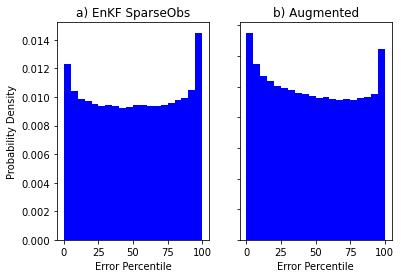

In [34]:
def Figure7(figname=None):
    plt.rc('font', size=10)
    dir = 'Processed Data/Other/'
    ranks_sparse = np.load(dir+'sparseranks.npy')
    ranks_aug = np.load(dir+'augranks.npy')
    plt.subplots(1,2)
    plt.subplot(1,2,1)
    plt.title('a) EnKF SparseObs')
    plt.hist(ranks_sparse,bins=20,color='b',density=True)
    plt.ylabel('Probability Density')
    plt.xlabel('Error Percentile')
    plt.subplot(1,2,2)
    plt.hist(ranks_aug,bins=20,color = 'b',density=True)
    plt.xlabel('Error Percentile')
    plt.title('b) Augmented')
    plt.gca().tick_params(axis="y", labelleft=False)
    if figname is not None:
        plt.savefig(figname)
Figure7()

## Figure 8

(80, 1000, 120)


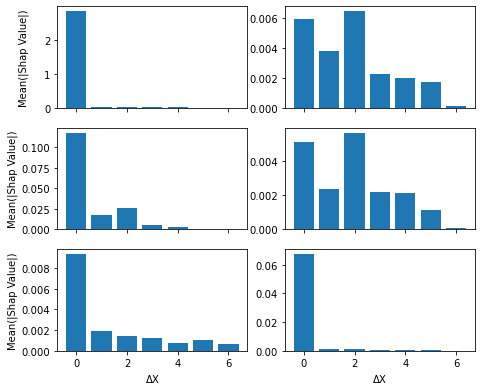

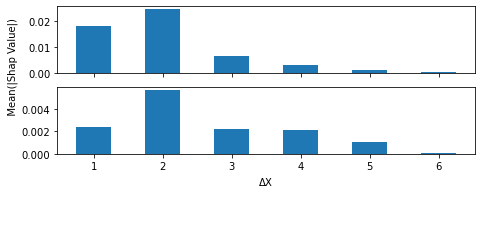

In [10]:
def process_shap(shapvals,maxdist):
    noutput,nsamples,ninput = shapvals.shape
    N = 40
    ret_state = np.zeros([nsamples,(maxdist+1),2])
    ret_innov = np.zeros(ret_state.shape)
    ret_stdev = np.zeros(ret_state.shape)
    shap_abs = np.abs(shapvals)
    for i in range(N):
        ret_state[:,0,0] += shap_abs[i,:,i]/N
        for j in range(1,maxdist+1):
            dist = j
            idx = i+j
            if idx>(N-1):
                idx = idx-N
            ret_state[:,j,0] += shap_abs[i,:,idx]/(2*N)
            idx = i-dist
            if idx<0:
                idx=idx+N
            ret_state[:,j,0] +=shap_abs[i,:,idx]/(2*N)

    for i in range(N):
        ret_innov[:,0,0] += shap_abs[i,:,i+N]/N
        for j in range(1,maxdist+1):
            dist = j
            idx = i+j
            if idx>(N-1):
                idx = idx-N
            idx = idx+N
            ret_innov[:,j,0] += shap_abs[i,:,idx]/(2*N)
            idx = i-dist
            if idx<0:
                idx=idx+N
            idx = idx+N
            ret_innov[:,j,0] +=shap_abs[i,:,idx]/(2*N)

    for i in range(N):
        ret_stdev[:,0,0] += shap_abs[i,:,i+2*N]/N
        for j in range(1,maxdist+1):
            dist = j
            idx = i+j
            if idx>(N-1):
                idx = idx-N
            idx = idx+2*N
            ret_stdev[:,j,0] += shap_abs[i,:,idx]/(2*N)
            idx = i-dist
            if idx<0:
                idx=idx+N
            idx = idx+2*N
            ret_stdev[:,j,0] +=shap_abs[i,:,idx]/(2*N)

    for i in range(N):
        ret_state[:,0,1] += shap_abs[i+N,:,i]/N
        for j in range(1,maxdist+1):
            dist = j
            idx = i+j
            if idx>(N-1):
                idx = idx-N
            ret_state[:,j,1] += shap_abs[i+N,:,idx]/(2*N)
            idx = i-dist
            if idx<0:
                idx=idx+N
            ret_state[:,j,1] +=shap_abs[i+N,:,idx]/(2*N)

    for i in range(N):
        ret_innov[:,0,1] += shap_abs[i+N,:,i+N]/N
        for j in range(1,maxdist+1):
            dist = j
            idx = i+j
            if idx>(N-1):
                idx = idx-N
            idx = idx+N
            ret_innov[:,j,1] += shap_abs[i+N,:,idx]/(2*N)
            idx = i-dist
            if idx<0:
                idx=idx+N
            idx = idx+N
            ret_innov[:,j,1] +=shap_abs[i+N,:,idx]/(2*N)

    for i in range(N):
        ret_stdev[:,0,1] += shap_abs[i+N,:,i+2*N]/N
        for j in range(1,maxdist+1):
            dist = j
            idx = i+j
            if idx>(N-1):
                idx = idx-N
            idx = idx+2*N
            ret_stdev[:,j,1] += shap_abs[i+N,:,idx]/(2*N)
            idx = i-dist
            if idx<0:
                idx=idx+N
            idx = idx+2*N
            ret_stdev[:,j,1] +=shap_abs[i+N,:,idx]/(2*N)
    return(ret_state,ret_innov,ret_stdev)


def Figure8a_f(figname=None):
    plt.rc('font', size=10)
    ret = np.load('Processed Data/Other/shapvals.npy')
    print(ret.shape)
    ret = np.abs(ret)
    shapvals = process_shap(ret,6)
    plt.subplots(3,2)
    plt.subplot(3,2,1)
    plt.bar([0,1,2,3,4,5,6],shapvals[0].mean(axis=0)[:,0])
    plt.ylabel('Mean(|Shap Value|)',labelpad=15)
    plt.gca().get_xaxis().set_ticklabels([])

    plt.subplot(3,2,2)
    plt.bar([0,1,2,3,4,5,6],shapvals[0].mean(axis=0)[:,1])
    plt.gca().get_xaxis().set_ticklabels([])

    plt.subplot(3,2,3)
    plt.bar([0,1,2,3,4,5,6],shapvals[2].mean(axis=0)[:,0])
    plt.ylabel('Mean(|Shap Value|)')
    plt.gca().get_xaxis().set_ticklabels([])


    plt.subplot(3,2,4)
    plt.bar([0,1,2,3,4,5,6],shapvals[2].mean(axis=0)[:,1])
    plt.gca().get_xaxis().set_ticklabels([])

    plt.subplot(3,2,5)
    plt.bar([0,1,2,3,4,5,6],shapvals[1].mean(axis=0)[:,0])
    plt.ylabel('Mean(|Shap Value|)')
    plt.xlabel('$\Delta$X')

    plt.subplot(3,2,6)
    plt.bar([0,1,2,3,4,5,6],(shapvals[1].mean(axis=0)[:,1]))
    plt.xlabel('$\Delta$X')
    plt.gcf().set_size_inches([maxfigsize[0],maxfigsize[1]*.7])
    if figname is not None:
        plt.savefig(figname)
Figure8a_f()

def Figure8_gh():
    plt.subplots(2,1)
    plt.subplot(2,1,1)
    ret = np.load('Processed Data/Other/shapvals.npy')
    ret = np.abs(ret)
    plt.bar([1,2,3,4,5,6],process_shap(ret,6)[0].mean(axis=0)[1:,0],width=0.5)
    plt.gca().get_xaxis().set_ticklabels([])
    plt.subplot(2,1,2)
    plt.bar([1,2,3,4,5,6],process_shap(ret,6)[2].mean(axis=0)[1:,1],width=0.5)
    plt.xlabel('$\Delta$X')
    plt.ylabel(' '*35+'Mean(|Shap Value|)')
    plt.gcf().set_size_inches([maxfigsize[0],maxfigsize[1]*.3])

Figure8_gh()

## Figure S1

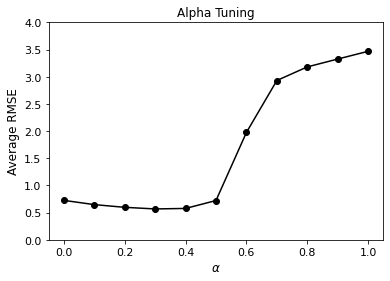

In [43]:
def S1(figname=None):
    res = [float(xr.load_dataset('Processed Data/AlphaTuning/a'+str(i)+'_rmse.nc').mean().__xarray_dataarray_variable__) for i in range(0,11)]
    res.reverse()
    plt.title('Alpha Tuning',fontsize=12)
    plt.plot([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1],res,'ko-')
    plt.xlabel(r'$\alpha$',fontsize=12)
    plt.ylabel('Average RMSE',fontsize=12)
    plt.ylim([0,4])
    if figname is not None:
        plt.savefig(figname)
S1()

## Figure S2

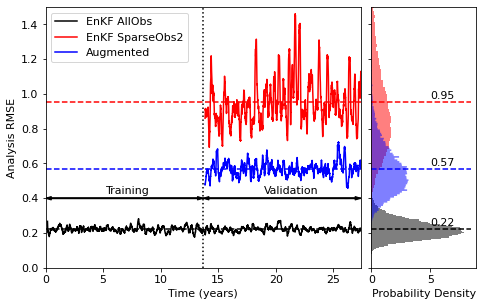

In [8]:
def S2(figname=None):
    plt.rc('font', size=11)
    windowsize = 12
    nt = int(windowsize/0.05)

    fig = plt.figure(figsize=[8,5])
    gs = fig.add_gridspec(1, 2,  width_ratios=(3, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
    ax = fig.add_subplot(gs[0, 0])
    ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

    rmse = xr.open_dataarray('Processed Data/Sensitivity/base_rmse.nc')
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=nt).mean().plot.line(x='yrs',color='k',label='EnKF AllObs',ax=ax)
    rms_means = [float(rmse.mean())]
    rmse.plot.hist(ax=ax_histy,bins=100,density=True,alpha=0.5,color='k',orientation='horizontal',histtype='stepfilled')


    rmse = xr.open_dataarray('Processed Data/Validation/'+'spobs2_rmse.nc')
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=nt).mean().plot.line(x='yrs',color='r',label='EnKF SparseObs2',ax=ax)
    rms_means.append(float(rmse.mean()))
    rmse.plot.hist(ax=ax_histy,bins=200,density=True,alpha=0.5,color='r',orientation='horizontal',histtype='stepfilled')

    rmse = xr.open_dataarray('Processed Data/Validation/a_base_rmse.nc')
    rmse = rmse.assign_coords({'yrs':('time',(5*rmse.time/365).data)})
    rmse.rolling(time=nt).mean().plot.line(x='yrs',color='b',label='Augmented',ax=ax)
    rmse.plot.hist(ax=ax_histy,bins=500,density=True,alpha=0.5,color='b',orientation='horizontal',histtype='stepfilled')
    rms_means.append(float(rmse.mean()))
    plt.sca(ax)
    plt.arrow(0,.4,1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.arrow(1000*5/365,.4,-1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.text(5.25,.425,'Training')
    plt.arrow(1000*5/365,.4,1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.arrow(2000*5/365,.4,-1000*5/365,0,width = .004,color='k',length_includes_head=True,head_length=0.5,head_width=0.02)
    plt.text(19,.425,'Validation')
    plt.xlabel('Time (years)')
    plt.ylabel('Analysis RMSE')
    plt.xlim([0,29])
    ax.legend()
    ax.hlines(rms_means,xmin=0,xmax=29,colors=['k','r','b'],linestyles=['--'])
    for val in rms_means:
        ax_histy.text(5,val+.02,"{:.2f}".format(val))
    plt.vlines(float(rmse.yrs.max())/2,0,1.5,colors='k',linestyles=':')
    plt.ylim([0,1.5])
    plt.xlim([0,2000*5/365])
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.hlines(rms_means[1],0,8.5,colors='r',linestyles='--')
    ax_histy.hlines(rms_means[2],0,8.5,colors='b',linestyles='--')
    ax_histy.hlines(rms_means[0],0,8.5,colors='k',linestyles='--')
    plt.sca(ax_histy)
    plt.xlabel('Probability Density')
    plt.gcf().set_size_inches(maxfigsize[0],maxfigsize[1]*.5)
    #plt.gcf().set_size_inches(maxfigsize[0],maxfigsize[1]*.6)
    if figname is not None:
        plt.savefig(figname)
S2()

## Figure S3

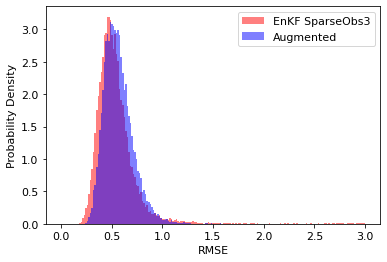

In [9]:
def S3():
   rmse = xr.open_dataarray('Processed Data/Validation/'+'spobs3_rmse.nc')
   plt.hist(rmse,bins = np.linspace(0,3,200),color='r',label='EnKF SparseObs3',alpha=0.5,density=True)
   rmse = xr.open_dataarray('Processed Data/Validation/'+'a_base_rmse.nc')
   plt.hist(rmse,bins=np.linspace(0,3,200),color='b',label='Augmented',alpha=.5,density=True)
   plt.ylabel('Probability Density')
   plt.xlabel('RMSE')
   plt.legend()
S3()